In [1]:
autosave 0

Autosave disabled


# Import libraries, read data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns

In [3]:
side2 = pd.read_excel(r"C:\Users\grant\Static dashboard Seaborn\renewable_electricity.xlsx")

In [4]:
renewable = side2.copy().T
renewable

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
Country,Afghanistan,Albania,Algeria,American Samoa,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Aruba,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Continent,Asia,Europe,Africa,Oceania,Africa,Antarctica,N. America,S. America,Europe,S. America,...,Europe,N. America,S. America,Asia,Oceania,S. America,Asia,Asia,Africa,Africa
All renewables 2015,86.1,100.0,0.3,NaN,54.5,NaN,NaN,30.7,29.6,17.8,...,27.4,14.0,89.1,21.5,9.1,64.9,37.9,NaN,97.1,54.0
All renewables 2020,82.8,100.0,1.1,0.0,68.2,0.0,4.4,27.1,24.6,16.0,...,47.1,20.9,98.3,10.8,14.9,68.4,28.2,14.6,87.0,66.0
Excluding hydropower,3.8,0.4,0.9,0.0,1.6,0.0,4.4,9.5,0.3,16.0,...,44.5,13.7,48.7,0.0,14.9,0.1,3.9,14.6,1.4,1.8
All electricity generation [GWh],1.1,5.2,76.7,0.2,13.6,0.0,0.3,137.8,7.3,0.9,...,299.5,4050.8,15.8,60.2,0.1,105.4,214.1,3.4,16.0,11.3
All renewables [GWh],0.9,5.2,0.8,0.0,9.2,0.0,0.0,37.3,1.8,0.1,...,141.0,847.0,15.5,6.5,0.0,72.1,60.4,0.5,13.9,7.5
Non-hydro renewables [GWh],0.04,0.02,0.69,0.0,0.22,0.0,0.02,13.02,0.02,0.15,...,133.37,555.89,7.69,0.01,0.01,0.1,8.38,0.5,0.23,0.2


# Prepare data

In [5]:
renewable.columns= renewable.iloc[0]
renewable.drop(['Continent', 'Country'], inplace=True)
renewable.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Angola,Antarctica,Antigua & Barbuda,Argentina,Armenia,Aruba,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
All renewables 2015,86.1,100.0,0.3,NaN,54.5,NaN,NaN,30.7,29.6,17.8,...,27.4,14.0,89.1,21.5,9.1,64.9,37.9,NaN,97.1,54.0
All renewables 2020,82.8,100.0,1.1,0.0,68.2,0.0,4.4,27.1,24.6,16.0,...,47.1,20.9,98.3,10.8,14.9,68.4,28.2,14.6,87.0,66.0
Excluding hydropower,3.8,0.4,0.9,0.0,1.6,0.0,4.4,9.5,0.3,16.0,...,44.5,13.7,48.7,0.0,14.9,0.1,3.9,14.6,1.4,1.8
All electricity generation [GWh],1.1,5.2,76.7,0.2,13.6,0.0,0.3,137.8,7.3,0.9,...,299.5,4050.8,15.8,60.2,0.1,105.4,214.1,3.4,16.0,11.3
All renewables [GWh],0.9,5.2,0.8,0.0,9.2,0.0,0.0,37.3,1.8,0.1,...,141.0,847.0,15.5,6.5,0.0,72.1,60.4,0.5,13.9,7.5


In [6]:
axes_settings = {
    "spines.top": False,
    "spines.right": False,
   }
plt.rc("axes", **axes_settings)

In [7]:
china_vs_others = (renewable.assign(Rest_of_world = renewable.drop("China", axis=1).sum(axis=1))
                    .loc[:, ["China", "Rest_of_world"]].astype({"China": "float64"}))
china_vs_others

Country,China,Rest_of_world
All renewables 2015,25.00,6575.4
All renewables 2020,29.20,7097.8
Excluding hydropower,11.40,1961.7
All electricity generation [GWh],7601.20,18238.2
All renewables [GWh],2220.50,5379.6
Non-hydro renewables [GWh],865.29,2351.7


In [8]:
renewable["Rest of World"] = renewable.drop(["China", "United States", "Brazil", "Canada", "India"], axis=1).sum(axis=1)
renewable_top5_2020 = renewable.loc['All renewables [GWh]', ["China", "United States", "Brazil", "Canada",
                                                             "India", "Rest of World"]]
pd.DataFrame(renewable_top5_2020)

,All renewables [GWh]
Country,
China,2220.5
United States,847.0
Brazil,534.7
Canada,433.7
India,315.4
Rest of World,3248.8


# Plot page1

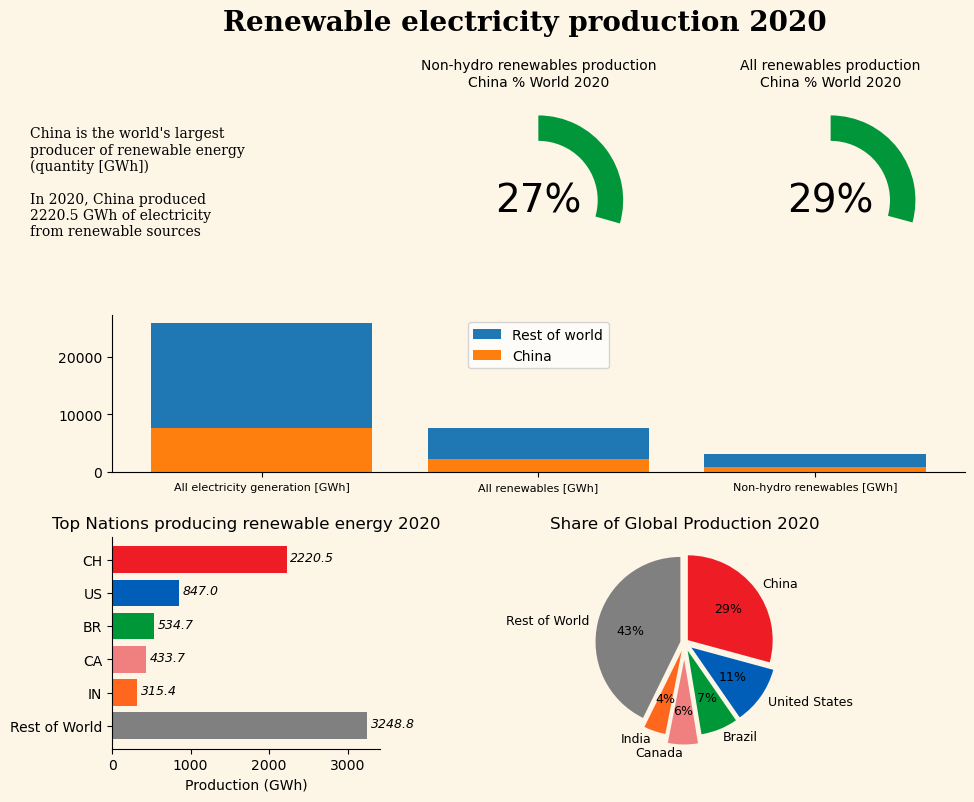

In [9]:
fig = plt.figure(figsize=(11, 8.5))
fig.patch.set_facecolor('oldlace')
gs = gridspec.GridSpec(nrows=12, ncols=6 )
fig.suptitle("Renewable electricity production 2020", fontsize=20, fontweight="bold", fontfamily='serif')
fig.text(.05, .695, 
'''China is the world's largest 
producer of renewable energy
(quantity [GWh])

In 2020, China produced
2220.5 GWh of electricity
from renewable sources
'''
, fontsize=10, fontweight='light', fontfamily='serif')


#-------------------- plot1 -------------------- 
ax1 = fig.add_subplot(gs[0:4, 2:4])
ax1.pie(x=china_vs_others.iloc[3].sort_values(ascending=False), startangle=90, labels = ["", ""], pctdistance=.85,
    colors=["oldlace", "#009639"])
center_circle = plt.Circle((0, 0), 0.70, fc='oldlace')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)
plt.text(0, 0, f"""{round((china_vs_others.loc['Non-hydro renewables [GWh]', 'China'] 
    / china_vs_others.loc['Non-hydro renewables [GWh]'].sum()*100))}%""", ha='center', va='center', fontsize=28)
ax1.set_title("Non-hydro renewables production\nChina % World 2020", fontsize=10)


#-------------------- plot2 -------------------- 
ax2 = fig.add_subplot(gs[0:4, 4:])
ax2.pie(china_vs_others.iloc[4].sort_values(ascending=False), startangle=90, labels = ["", ""], pctdistance=.85,
    colors=["oldlace", "#009639"])
center_circle = plt.Circle((0, 0), 0.70, fc='oldlace')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)
plt.text(0, 0, f"""{round((china_vs_others.loc['All renewables [GWh]', 'China']
    / china_vs_others.loc['All renewables [GWh]'].sum()*100))}%""", ha='center', va='center', fontsize=28)
ax2.set_title("All renewables production\nChina % World 2020", fontsize=10)


#-------------------- plot3 -------------------- 
plot3 = china_vs_others.copy()
plot3 = plot3.drop(['All renewables 2015', 'All renewables 2020', 'Excluding hydropower'], axis = 0)
ax3 = fig.add_subplot(gs[4:7, :])
ax3.bar(plot3.index, plot3["Rest_of_world"], label="Rest of world", bottom=plot3["China"])
ax3.bar(plot3.index, plot3["China"], label="China")
plt.xticks(fontsize=8)
ax3.set_facecolor('oldlace')
ax3.legend(loc="upper center")


#-------------------- plot4 -------------------- 
ax4 = fig.add_subplot(gs[8:, 0:2])
ax4.barh(y=renewable_top5_2020.index[::-1], width=renewable_top5_2020.iloc[::-1],
        color=["grey", "#FF671F", "#F08080", "#009739", "#005EB8", "#EE1C25"])
positions = list(range(6))
labels = ["CH", "US", "BR", "CA", "IN", "Rest of World"][::-1]
ax4.set_title("Top Nations producing renewable energy 2020")
ax4.set_xlabel("Production (GWh)", fontsize=10)
ax4.set_facecolor('oldlace')
ax4.set_yticks(positions)
ax4.set_yticklabels(labels)
#plot values
for i in ax4.patches:
    plt.text(i.get_width()+50, i.get_y()+0.35, str(round((i.get_width()), 2)), fontsize = 9, style='italic', color ='black')


#-------------------- plot5 -------------------- 
ax5 = fig.add_subplot(gs[8:, 2:])
ax5.pie(renewable_top5_2020[::-1], autopct="%.0f%%", labels=list(renewable_top5_2020.index[::-1]), startangle=90,
       colors = ["grey", "#FF671F", "#F08080", "#009739", "#005EB8", "#EE1C25"], explode=(.05, .1, .2, .1, .1, .05),
       textprops={'fontsize': 9})
ax5.set_title("Share of Global Production 2020")
plt.show()

In [10]:
# save page to pdf file
fig.savefig('Static dashboard page1.pdf', bbox_inches='tight', dpi=300)

# Plot page2

In [11]:
side2 = side2[(side2.Continent !='Antarctica') & (side2.Continent !='Europe/Asia')]

In [12]:
side2

,Country,Continent,All renewables 2015,All renewables 2020,Excluding hydropower,All electricity generation [GWh],All renewables [GWh],Non-hydro renewables [GWh]
0,Afghanistan,Asia,86.1,82.8,3.8,1.1,0.9,0.04
1,Albania,Europe,100.0,100.0,0.4,5.2,5.2,0.02
2,Algeria,Africa,0.3,1.1,0.9,76.7,0.8,0.69
3,American Samoa,Oceania,NaN,0.0,0.0,0.2,0.0,0.00
4,Angola,Africa,54.5,68.2,1.6,13.6,9.2,0.22
...,...,...,...,...,...,...,...,...
208,Venezuela,S. America,64.9,68.4,0.1,105.4,72.1,0.10
209,Vietnam,Asia,37.9,28.2,3.9,214.1,60.4,8.38
210,Yemen,Asia,NaN,14.6,14.6,3.4,0.5,0.50
211,Zambia,Africa,97.1,87.0,1.4,16.0,13.9,0.23


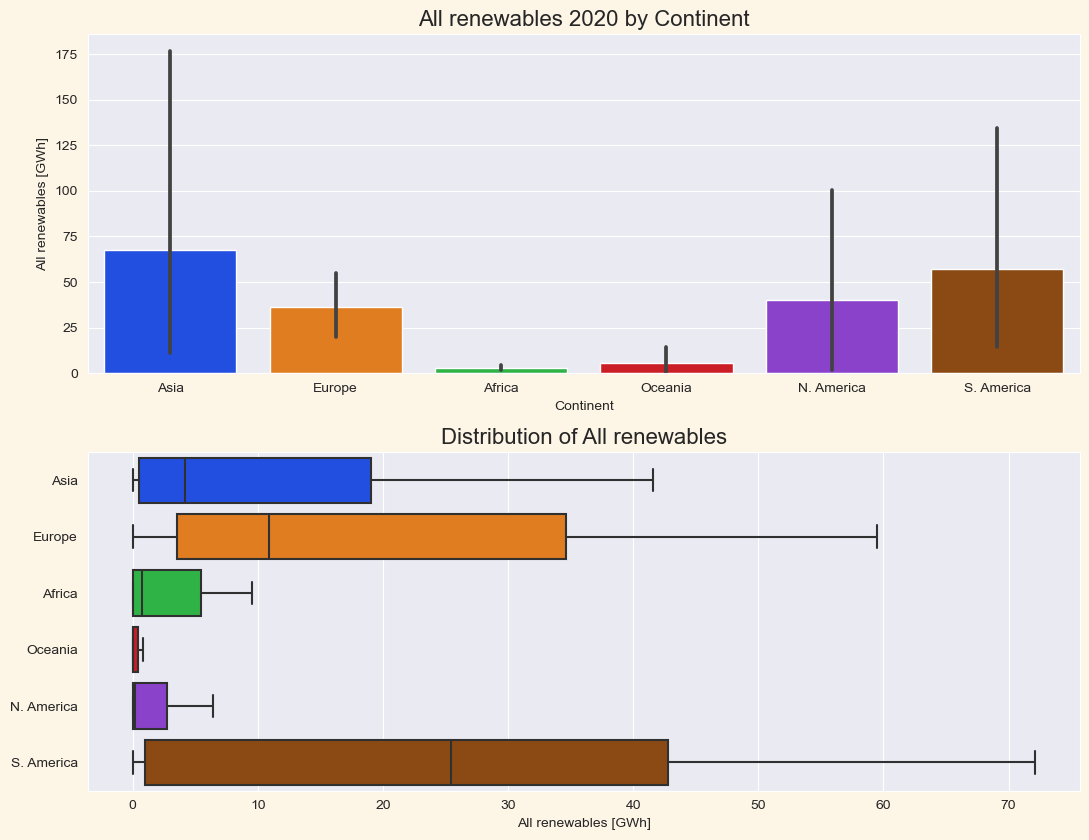

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(11, 8.5))
fig.patch.set_facecolor('oldlace')
sns.set_style("darkgrid")

#-------------------- plot1 -------------------- 
ax[0]=sns.barplot(data=side2, x="Continent", y="All renewables [GWh]", ax=ax[0], palette="bright")
ax[0].set_title("All renewables 2020 by Continent", fontsize=16)
ax[0].set_ylabel("All renewables [GWh]")

#-------------------- plot2 -------------------- 
ax[1]=sns.boxplot(data=side2, y="Continent", x="All renewables [GWh]", palette="bright", showfliers = False)
ax[1].set_title("Distribution of All renewables", fontsize=16)
ax[1].set(ylabel=None)

fig.tight_layout()

In [14]:
# save page to pdf file
fig.savefig('Static dashboard page2.pdf', bbox_inches='tight', dpi=300)

# Plot page3

In [15]:
side2_pivot = (side2.groupby("Continent")
 .agg({"All renewables 2015": "mean", "All renewables 2020": "mean"})
 .sort_values(by=["All renewables 2020"], ascending=False))

In [16]:
side2_pivot

,All renewables 2015,All renewables 2020
Continent,,
S. America,57.135714,55.566667
Europe,38.260000,43.026829
Africa,44.236170,37.072222
N. America,32.586957,26.848571
Asia,28.345000,24.970833
Oceania,32.237500,19.158824


In [17]:
side3_pivot = (side2.groupby("Continent")
 .agg({"All renewables [GWh]": "sum", "Non-hydro renewables [GWh]": "sum"})
 .sort_values(by=["Non-hydro renewables [GWh]"], ascending=False))

In [18]:
side3_pivot

,All renewables [GWh],Non-hydro renewables [GWh]
Continent,,
Asia,3248.1,1331.52
Europe,1494.2,894.81
N. America,1399.5,673.16
S. America,859.0,169.12
Oceania,98.2,57.35
Africa,169.9,33.27


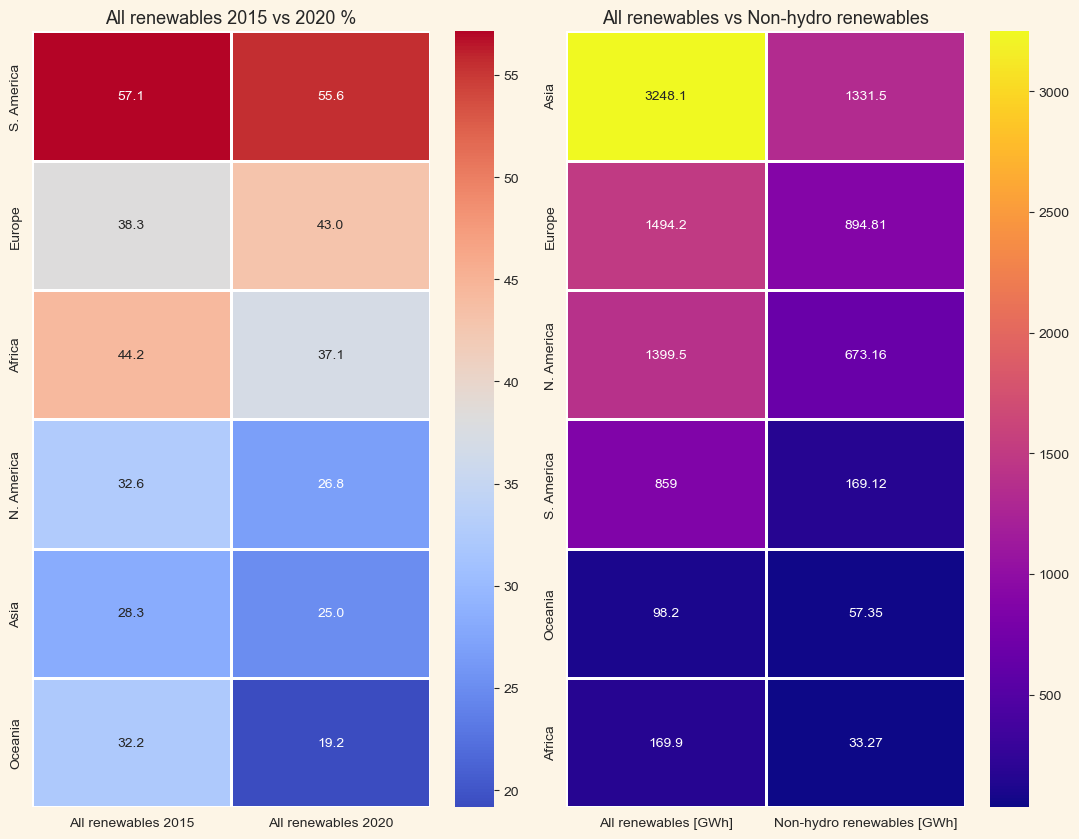

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(11, 8.5))
fig.patch.set_facecolor('oldlace')

#-------------------- plot1 -------------------- 
ax[0]=sns.heatmap(side2_pivot, cmap='coolwarm', annot=True, fmt=".3", ax=ax[0], linewidth=1)
ax[0].set_title("All renewables 2015 vs 2020 %", fontsize=13)
ax[0].set(ylabel=None)

#-------------------- plot2 -------------------- 
ax[1]=sns.heatmap(side3_pivot, cmap='plasma', annot=True, fmt=".5g", ax=ax[1], linewidth=1)
ax[1].set_title("All renewables vs Non-hydro renewables", fontsize=13)
ax[1].set(ylabel=None)
plt.xticks(fontsize=10)
plt.xticks(rotation=0)

fig.tight_layout()

In [20]:
# save page to pdf file
fig.savefig('Static dashboard page3.pdf', bbox_inches='tight', dpi=300)

# Merge saved pages (pdf files) to 1 pdf file

In [21]:
from pypdf import PdfMerger
files = ['Static dashboard page1.pdf', 'Static dashboard page2.pdf', 'Static dashboard page3.pdf']
merger = PdfMerger()
for pdf in files:
    merger.append(pdf)
merger.write("Static dashboard.pdf")
merger.close()